### SpaceX Falcon 9 First Stage Landing Prediction

### __Assignment: Exploring and Preparing Data__

##### Import Libraries and Define Auxiliary Functions     
We will import the following libraries the lab

In [5]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

##### Exploratory Data Analysis
First, let's read the SpaceX dataset into a Pandas dataframe and print its summary

In [7]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

##### TASK 1: Visualize the relationship between Flight Number and Launch Site

C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


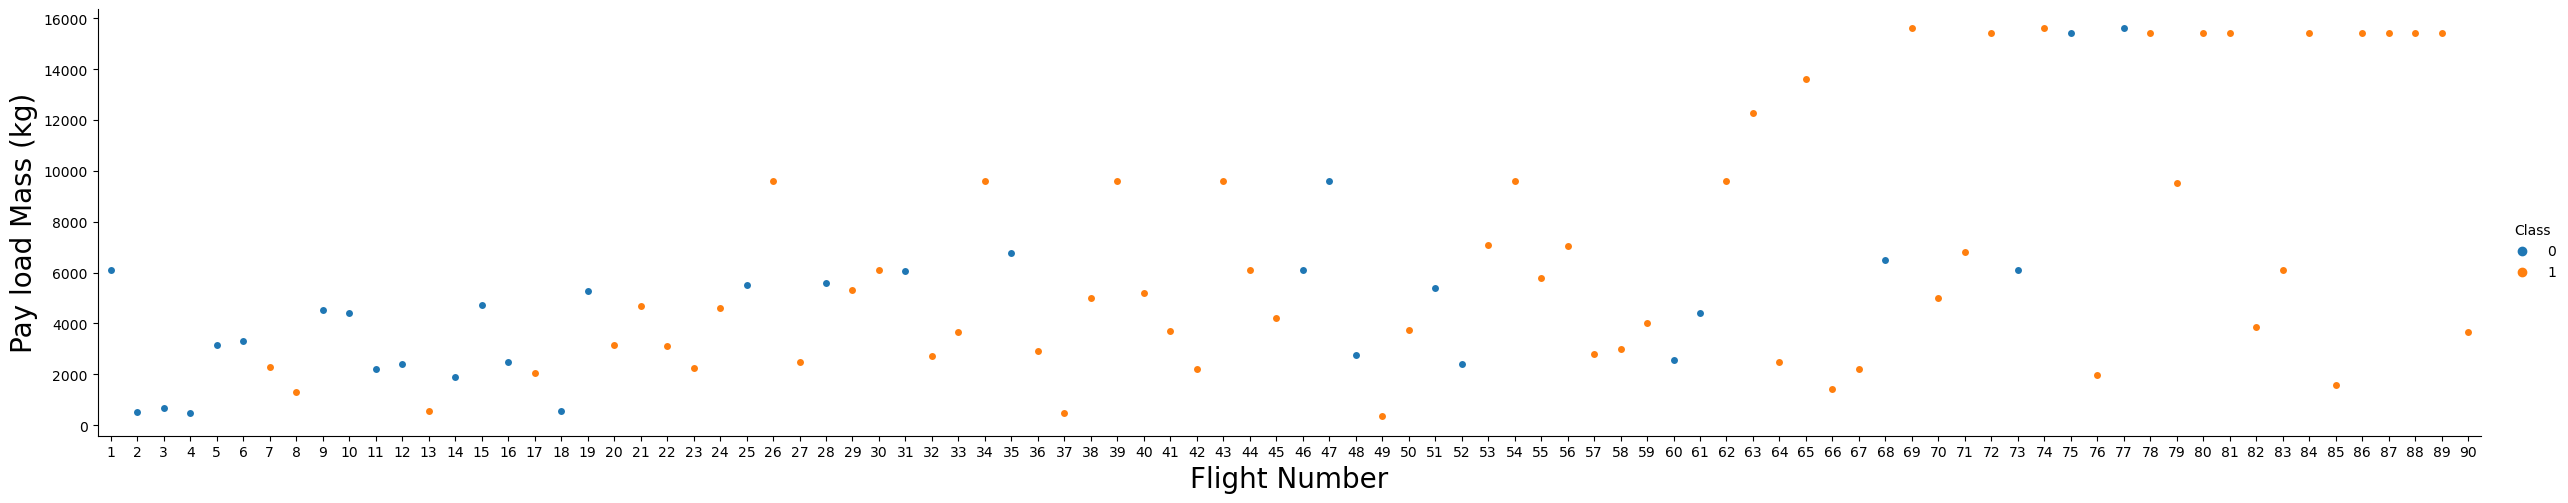

In [8]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

__Findings:__  
1. As the flight number increases, the first stage is more likely to land successfully.

2. The more massive the payload is, the less likely the first stage will return.

3. Different launch sites have different success rates: CCAFS LC-40, has a success rate of 60 %, while KSC LC-39A and VAFB SLC 4E has a success rate of 77%.

C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


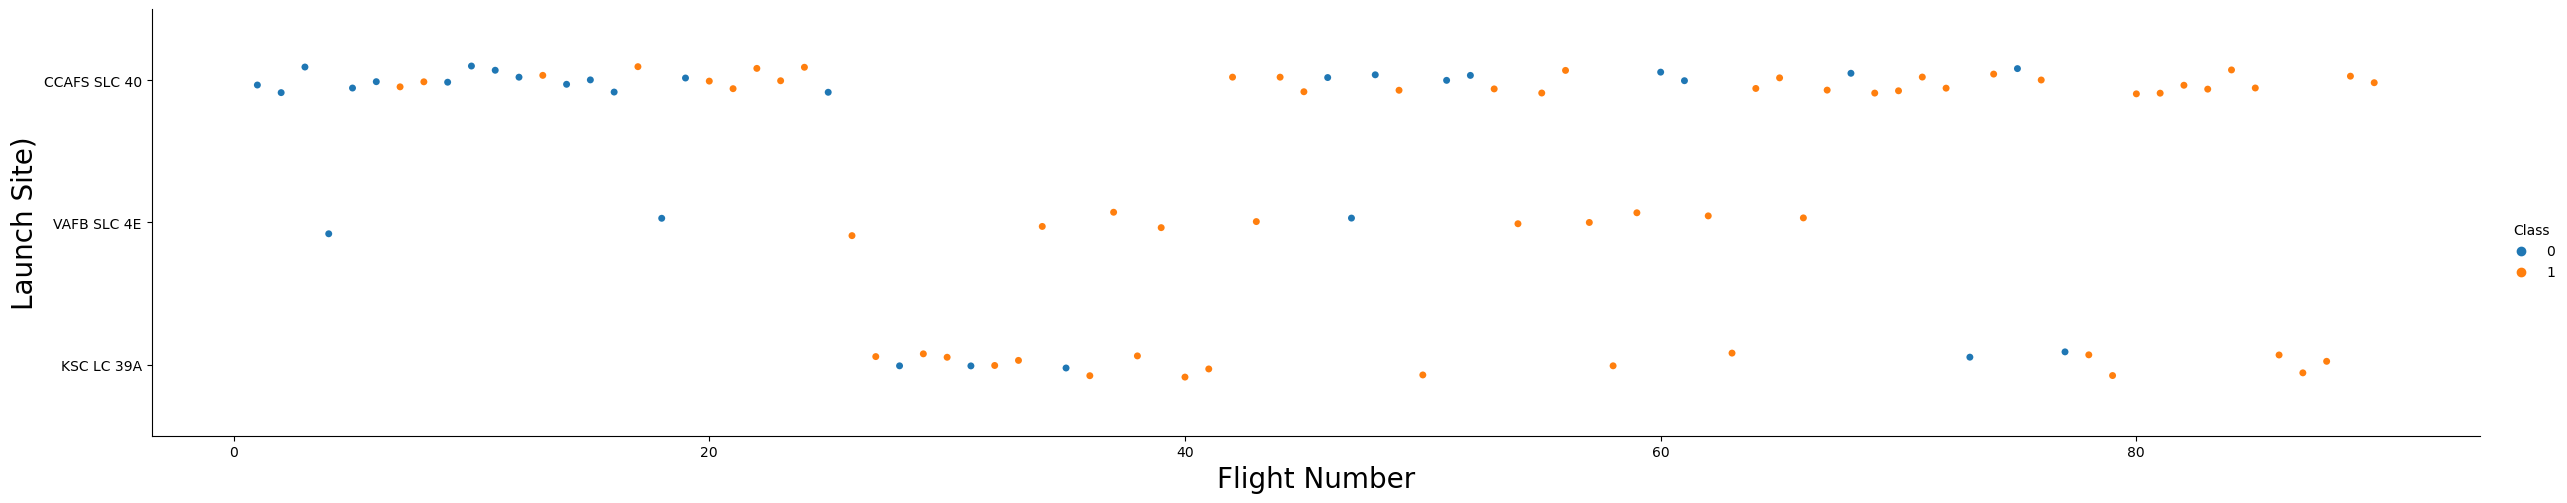

In [10]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y='LaunchSite', x='FlightNumber', hue='Class', data=df, aspect=5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site)",fontsize=20)
plt.show()

__Findings:__

1. CCAFS LC-40: No strong relationship between flight number and success rate. Success appears consistent across various flight numbers.

2. KSC LC-39A: Similarly, no strong correlation between flight number and success rate. Success rates vary across flight numbers.

3. VAFB SLC 4E: Success rates appear consistent, regardless of flight number.

##### TASK 2: Visualize the relationship between Payload and Launch Site

We also want to observe if there is any relationship between launch sites and their payload mass.

C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


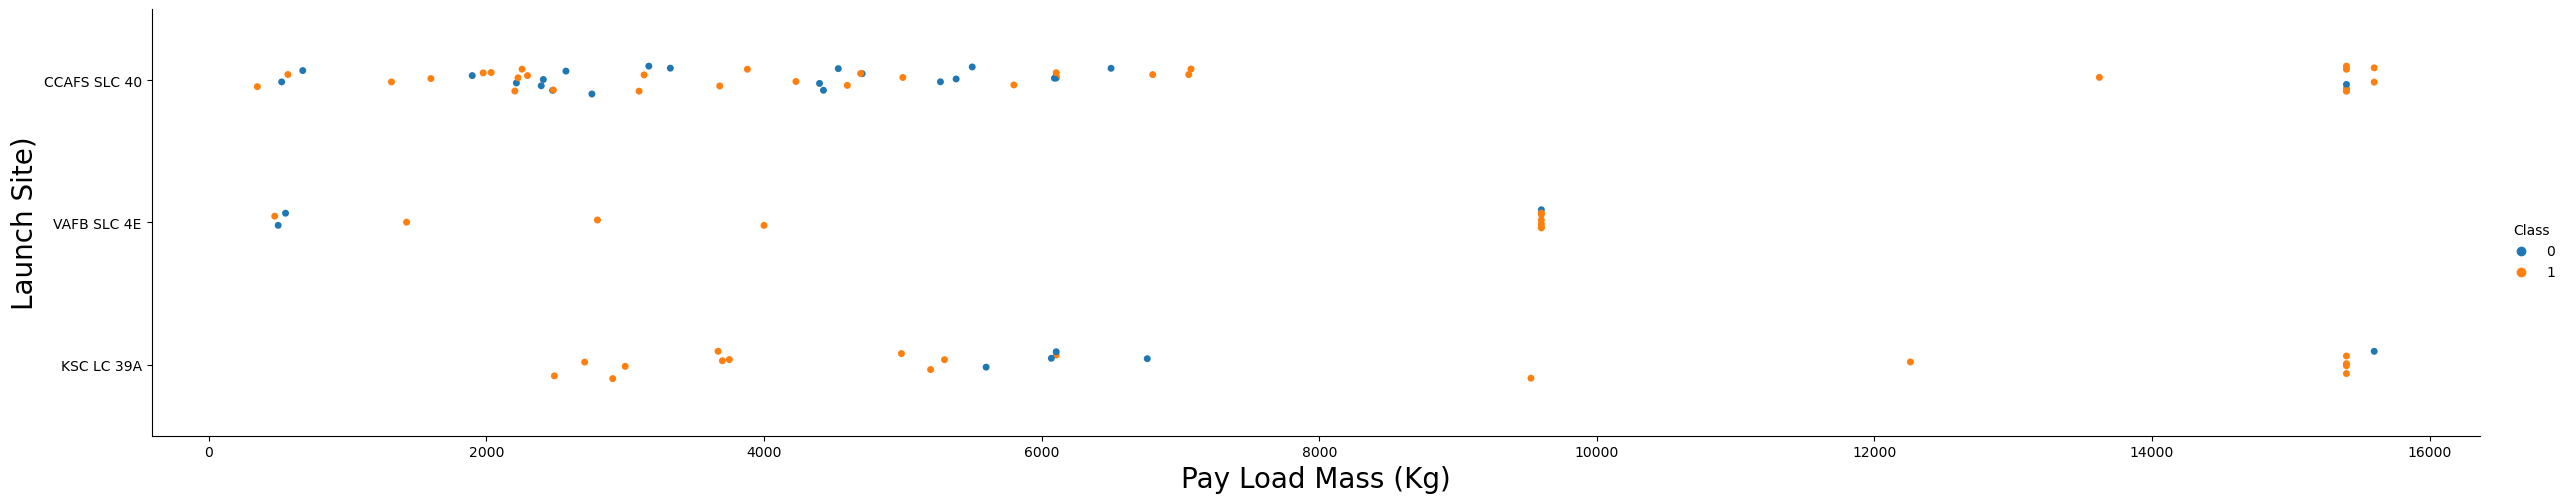

In [11]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y='LaunchSite', x='PayloadMass', hue='Class', data=df, aspect=5)
plt.xlabel("Pay Load Mass (Kg)",fontsize=20)
plt.ylabel("Launch Site)",fontsize=20)
plt.show()

__Findings:__
    
1. VAFB-SLC: No rockets launched for heavy payload mass (greater than 10,000).

2. Other Launch Sites: Rockets launched for a range of payload masses.

3. The launch site affects payload capacity and handling.

##### TASK  3: Visualize the relationship between success rate of each orbit type

Next, we want to visually check if there are any relationship between success rate and orbit type.

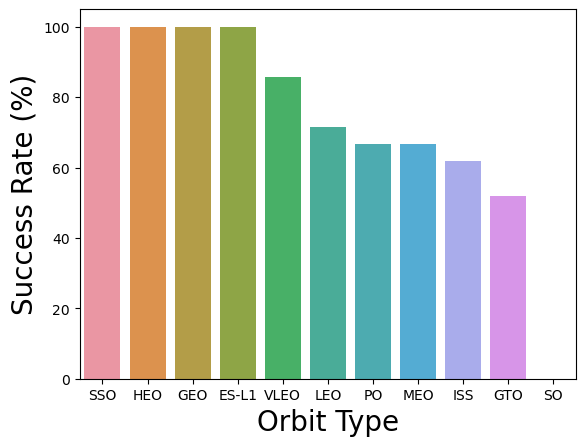

In [12]:
# HINT use groupby method on Orbit column and get the mean of Class column
orbit_success = df.groupby(['Orbit'])['Class'].aggregate(np.average).reset_index().sort_values(['Class','Orbit'], ascending=False)
orbit_success['Class'] = np.round(orbit_success['Class']*100, 2)
sns.barplot(x='Orbit', y='Class', data=orbit_success)
plt.ylabel("Success Rate (%)",fontsize=20)
plt.xlabel("Orbit Type",fontsize=20)
plt.show()

__Findings:__
    
1. SSE, HEO, GEO, ES-L1 Orbits: 100% success rates, indicating high reliability.

2. Other Orbit Types: Varying success rates, suggesting mission complexities.

### TASK  4: Visualize the relationship between FlightNumber and Orbit type

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


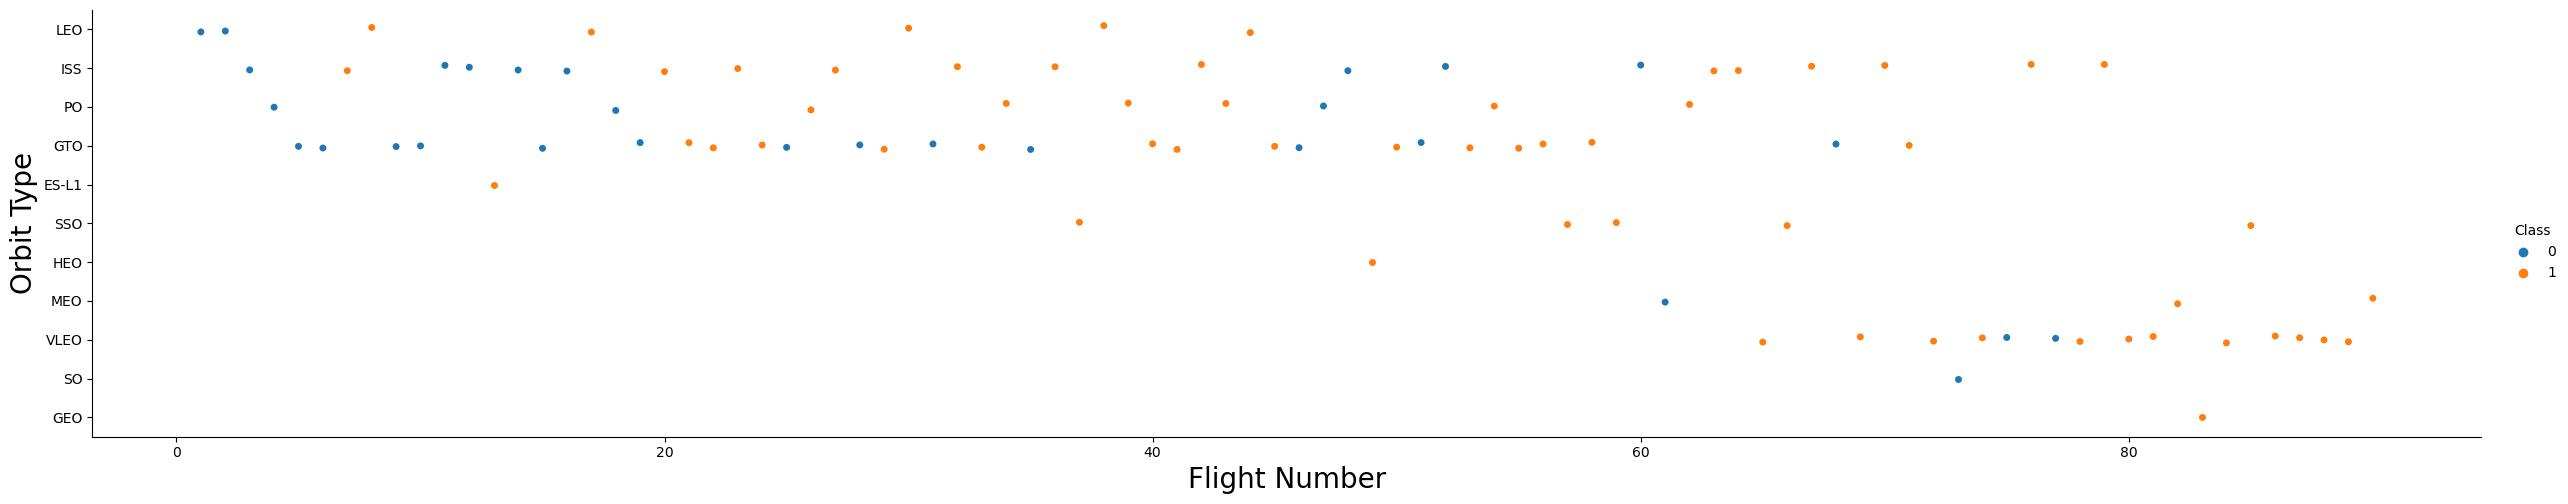

In [13]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x='FlightNumber', y='Orbit', hue='Class', data=df, aspect=5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

__Findings:__
    
1. LEO Orbit: Success appears correlated with the number of flights.

2. GTO Orbit: No clear relationship between flight number and success.

### TASK  5: Visualize the relationship between Payload and Orbit type

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type

C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


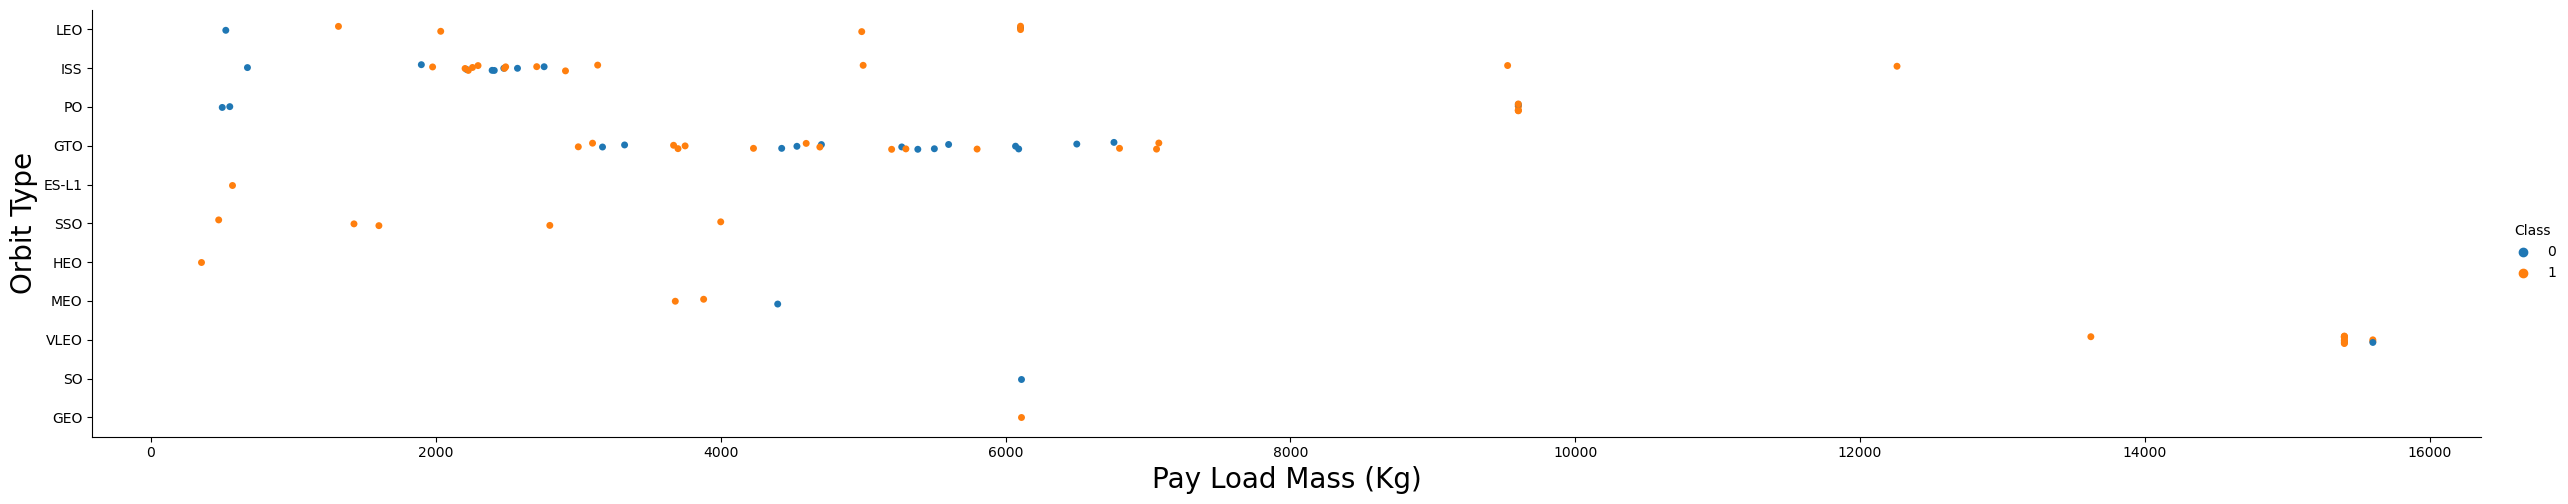

In [14]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(x='PayloadMass', y='Orbit', hue='Class', data=df, aspect=5)
plt.xlabel("Pay Load Mass (Kg)",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

__Findings:__
    
1. PO, LEO, ISS Orbits: Higher payload mass corresponds to a more successful landing.

2. GTO Orbit: Payload mass does not clearly affect landing success.

### TASK  6: Visualize the launch success yearly trend

You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.

The function will help you get the year from the date:

In [18]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


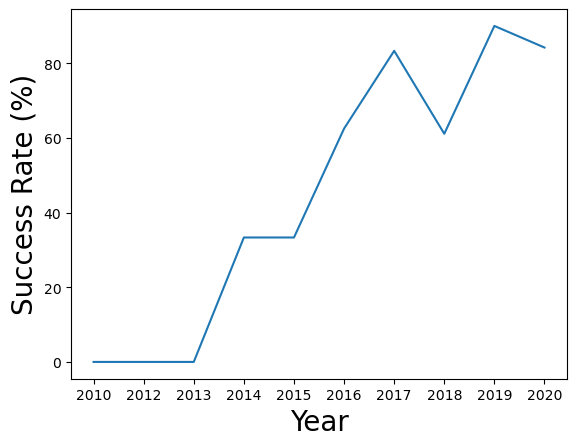

In [19]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

df['Year'] = [i.split("-")[0] for i in df["Date"]]
yearly_success = df.groupby(['Year'])['Class'].aggregate(np.average).reset_index().sort_values('Year')
yearly_success['Class'] = np.round(yearly_success['Class']*100, 2)

sns.lineplot(x='Year',y='Class', data=yearly_success)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Success Rate (%)",fontsize=20)
plt.show()

__Findings:__
    
1. 2013 to 2020: There is consistent increase in success rates.

2. Highlight: SpaceX's continual improvement in launch reliability.

In [21]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


__Feature Engineering__